In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("F:\Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
#Converting Categorical to Numerical by using get_dummies
df=pd.get_dummies(df,drop_first=True)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [7]:
X = df.loc[:,['Age', 'EstimatedSalary', 'Gender_Male']].values
y = df.loc[:,['Purchased']].values
X

array([[   19, 19000,     1],
       [   35, 20000,     1],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     0],
       [   36, 33000,     1],
       [   49, 36000,     0]], dtype=int64)

In [14]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.93657932, -1.78179743, -1.49004624, -0.74593581],
       [ 1.66838653, -0.25358736, -1.46068138, -0.74593581],
       [-0.32087714, -1.11320552, -0.78528968, -0.74593581],
       ...,
       [-0.52039175,  1.17910958, -1.46068138,  1.34059793],
       [ 0.88695546, -0.15807423, -1.07893824, -0.74593581],
       [-1.36231017,  1.08359645, -0.99084367,  1.34059793]])

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [132]:
acc_list = []
err_list = []
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)

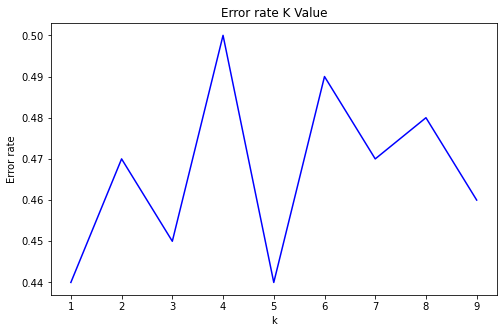

In [133]:
plt.figure(figsize=(8,5))
plt.plot(list(range(1,10)),err_list,c = 'b')
plt.title("Error rate K Value")
plt.xlabel('k')
plt.ylabel('Error rate')
plt.show()

In [134]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [135]:
confusion_matrix(y_test,y_pred)

array([[27, 18],
       [26, 29]], dtype=int64)

In [136]:
accuracy_score(y_test,y_pred)

0.56